In [1]:
#include necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Load the dataset 
df=pd.read_csv('customer_data.csv')
#first 5 rows of the dataset
print(df.head())


   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [3]:
#display basic info about the dataset
print(df.info())
#display the no of entries with null values

print('The no of null entries in each column is \n',df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
The no of null entries in each column is 
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


In [4]:
# we will use age, annual income, spending score as the features on which clustering will be performed
features=df[['Age','Annual_Income_(k$)','Spending_Score']]
#Standardize the data
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)
#Display the first few rows of the standardized result
print(scaled_features[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


C:\Users\paulm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\paulm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\paulm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\paulm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

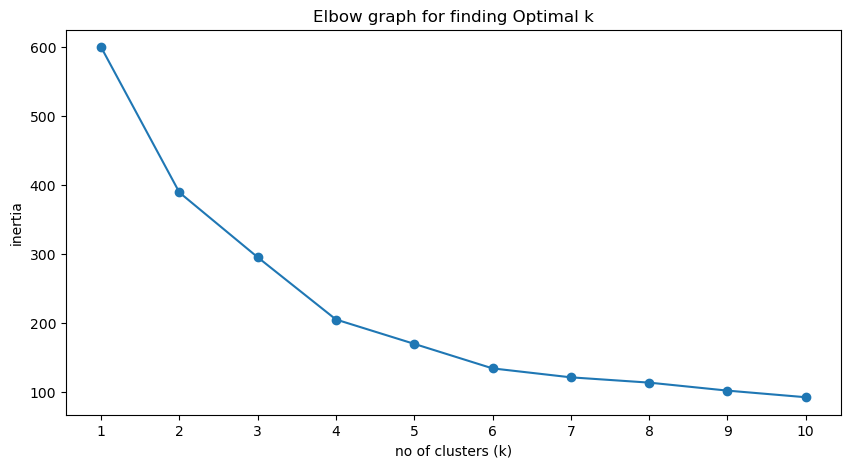

In [5]:
#Elbow method to find the optimal no of clusters 
inertia=[]
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
#PLotting the Elbow method graph
plt.figure(figsize=(10,5))
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow graph for finding Optimal k')
plt.xlabel('no of clusters (k)')
plt.ylabel('inertia')
plt.xticks(k_range)
plt.show()

In [6]:
optimal_k=4
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
cluster_label=kmeans.fit_predict(scaled_features)
#Add cluster labels to the orginal dataset
df['Cluster']=cluster_label
#Few rows with cluster label info
print(df.head(10))

   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score  Cluster
0           1    Male   19                  15              39        2
1           2    Male   21                  15              81        2
2           3  Female   20                  16               6        2
3           4  Female   23                  16              77        2
4           5  Female   31                  17              40        2
5           6  Female   22                  17              76        2
6           7  Female   35                  18               6        0
7           8  Female   23                  18              94        2
8           9    Male   64                  19               3        0
9          10  Female   30                  19              72        2


C:\Users\paulm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


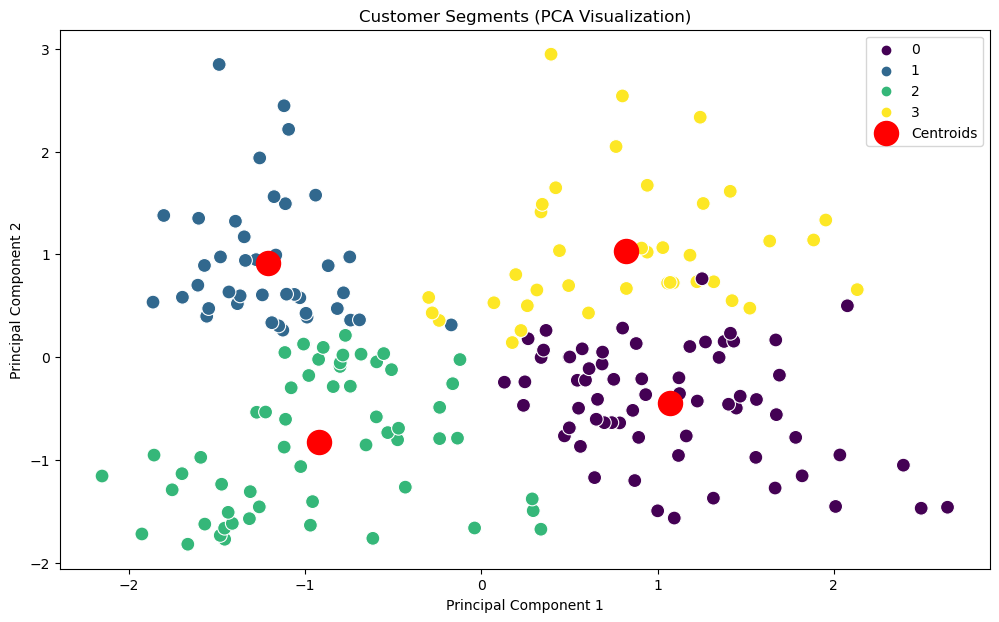

In [7]:
#Visualizing Clusters using 2D scatter plot

# Apply Principal Component Analysis to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)  # scaled_features is your normalized dataset

plt.figure(figsize=(12,7))
sns.scatterplot(x=pca_components[:,0],y=pca_components[:,1],hue=cluster_label,palette='viridis',s=100)

centroids_pca = pca.transform(kmeans.cluster_centers_)  # project cluster centers into PCA space
plt.scatter(centroids_pca[:, 0], 
            centroids_pca[:, 1], 
            s=300, 
            c='red', 
            label='Centroids')

# Step 4: Add titles and labels
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()